# PROBLEMA: ESTIMATIVA EXPERIMENTAL DA COMPLEXIDADE DE UMA FUNÇÃO DE UMA BIBLIOTECA

# Métodos de segmentação de imagens do tipo  Thresholding (Limiarização): 
> Divide uma imagem em regiões ou objetos binários com base em um valor de limiar. Bibliotecas: OpenCV, scikit-image.


## BIBLIOTECAS

In [1]:
%matplotlib inline
#pip install -U scikit-learn
#pip install imagehash
#pip install -U matplotlib

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

from sklearn.cluster import DBSCAN, KMeans

import seaborn as sns
sns.set()

from PIL import Image

import numpy as np
from numpy import mean
from numpy import isnan
from numpy import asarray

import os
import shutil, glob, os.path

from random import shuffle

from tqdm import tqdm

import math

import skimage
from skimage import data, io, color
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu 
from skimage.feature import canny 
from time import time
from random import randint
import cv2

from scipy import stats

from KMeans import KMeans

## **2. Leitura das imagens na pasta**

files in directory:  C:\Users\duike\OneDrive\Documentos\Repositorios\EngenhariaDeProgramas\FACES 
 ['branca01.jpg', 'branca02.jpg', 'branca03.jpg', 'casal_branco01.jpg', 'casal_moreno01.jpg', 'familia_branca01.jpg', 'familia_morena01.jpg', 'homem_branco01.jpg', 'homem_branco02.jpg', 'homem_branco03.jpg', 'homem_branco04.jpg', 'homem_moreno01.jpg', 'homem_moreno02.jpg', 'homem_moreno03.jpg', 'homem_moreno04.jpg', 'image_teste_segementacao_3_classes.png', 'jovem_branco01.jpg', 'jovem_branco02.jpg', 'jovem_branco03.jpg', 'jovem_branco04.jpg', 'jovem_loura01.jpg', 'jovem_moreno01.jpg', 'jovem_moreno02.jpg', 'jovem_moreno03.jpg', 'jovem_moreno04.jpg', 'morena01.jpg', 'morena02.jpg', 'morena03.jpg', 'mulher_morena01.jpg', 'mulher_morena02.jpg', 'mulher_morena03.jpg', 'senhora_branca01.jpg', 'senhora_branca02.jpg', 'senhora_branca03.jpg', 'senhora_branca04.jpg', 'senhora_morena01.jpg', 'senhora_morena02.jpg', 'senhora_morena03.jpg', 'senhora_morena04.jpg', 'senhor_branco01.jpg', 'senhor_branc

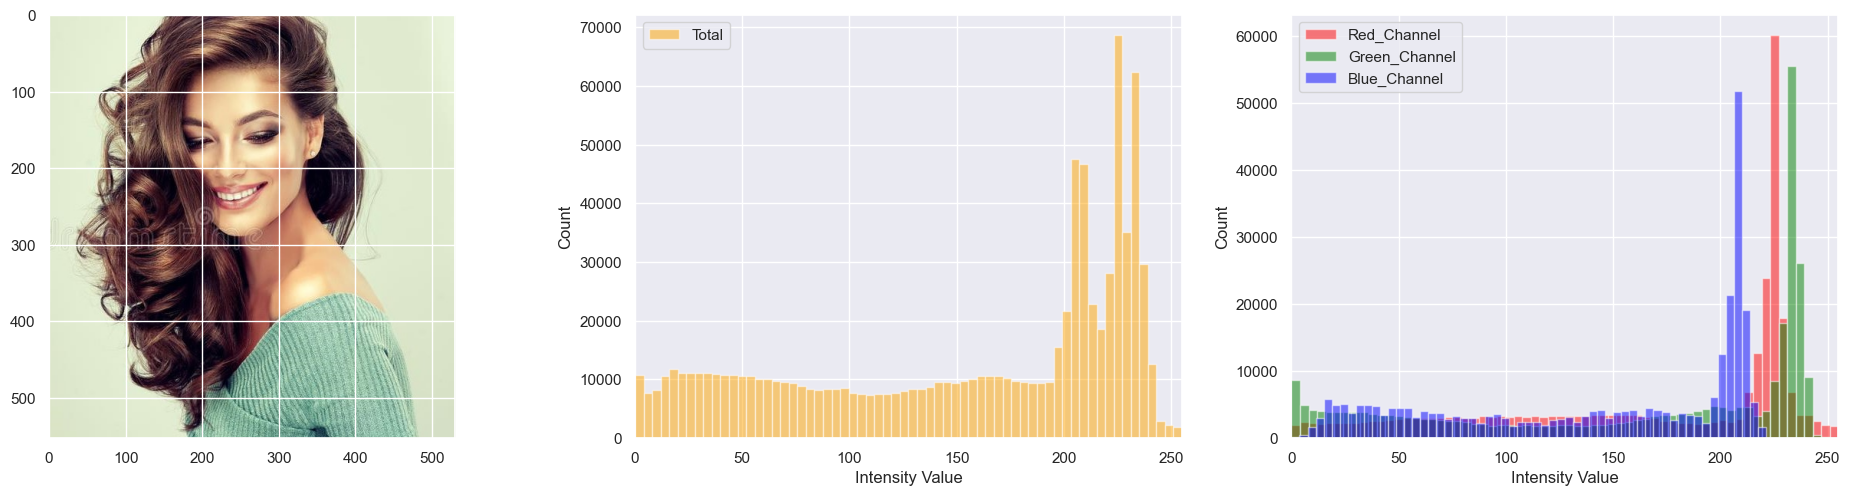

In [2]:
# PREPROCESSAMENTO DAS IMAGENS
INPUT_PATH = 'C:\\Users\\duike\\OneDrive\\Documentos\\Repositorios\\EngenhariaDeProgramas\\FACES'
Files=os.listdir(INPUT_PATH)
print("files in directory: ",INPUT_PATH,"\n",os.listdir(INPUT_PATH))

Img=[]
img=[]
ncolors=[]
ResX=[]
ResY=[]
n=[]

nImg = 1 # mnumero de imagens a processar na ordem de leitura
print("\nSelecionadas as ",nImg,"primeiras imagens")
ctr = 1
for filename in Files[:nImg]: 
    if filename.endswith('.jpg') or filename.endswith('.png'): # filtro formato da imagem
        try:
            img.append(io.imread(INPUT_PATH+"/"+filename))#, as_gray=as_gray)) # open the image file
            print("\nImagem #",ctr,':',filename)
            ctr+=1
            print("resolução da imagem: ",img[-1].shape)
            Img.append(img[-1]) # backup of original images
            ncolors.append(img[-1].shape[-1])
            ResX.append(img[-1].shape[0])
            ResY.append(img[-1].shape[1])
            n.append(ResX[-1]*ResY[-1])
            print("number of color channels: ", ncolors[-1])
         
#             plt.style.use('grayscale')
#             if ncolors[-1]>1: # if it is RGB convert to grayscale
#                 img[-1]=np.round(255*rgb2gray(img[-1])) # foca = [1,2,0,2]
#             ncolors[-1]=1
            fig2, ax2 = plt.subplots(1,3, figsize=(24, 5.5))
            ax2[0].imshow(img[-1])
            ax2[1].hist(img[-1].ravel(), bins = 64, color = 'orange', alpha = 0.5)
            ax2[1].legend(['Total'])
            ax2[2].hist(img[-1][:, :, 0].ravel(), bins = 64, color = 'Red', alpha = 0.5)
            ax2[2].hist(img[-1][:, :, 1].ravel(), bins = 64, color = 'Green', alpha = 0.5)
            ax2[2].hist(img[-1][:, :, 2].ravel(), bins = 64, color = 'Blue', alpha = 0.5)
            ax2[2].legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
            ax2[1].set_xlim(0, 255)
            ax2[1].set_xlabel('Intensity Value')
            ax2[1].set_ylabel('Count')
            ax2[2].set_xlim(0, 255)
            ax2[2].set_xlabel('Intensity Value')
            ax2[2].set_ylabel('Count')
            plt.show()
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)
            #os.remove(base_dir+"\\"+filename) (Maybe)


# 3. Realizando R repetições medindo o tempo do experimento de Clusterização de imagens com a implementação de KMeans, usando nImg imagens de resoluções distintas

n: [293643]
processando imagem 1


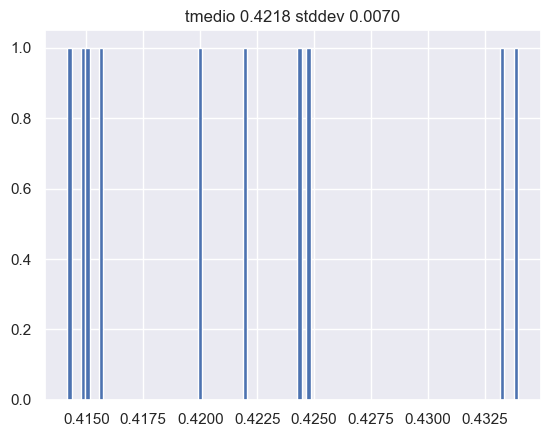

Limiar OTSU: 0.5236776937806373 calculado em 0.4218213319778442 segundos, numa imagem de 293643 pixels


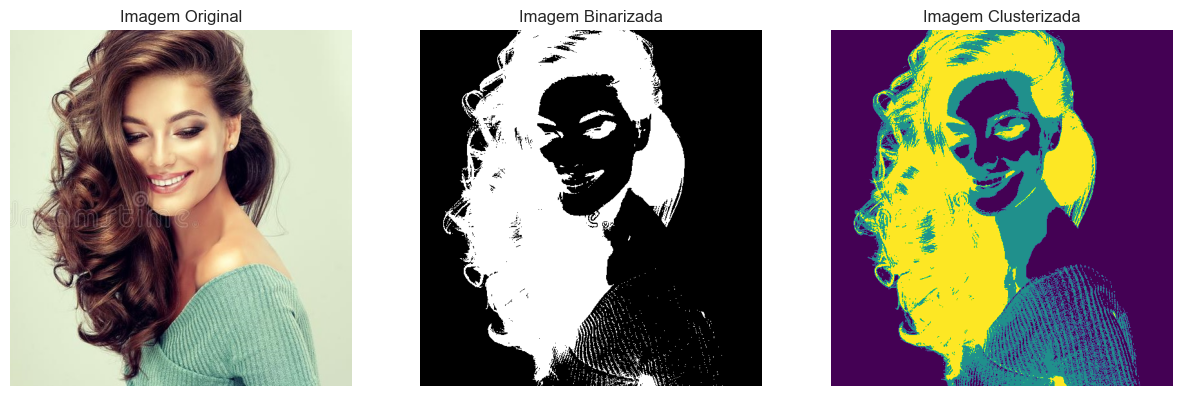

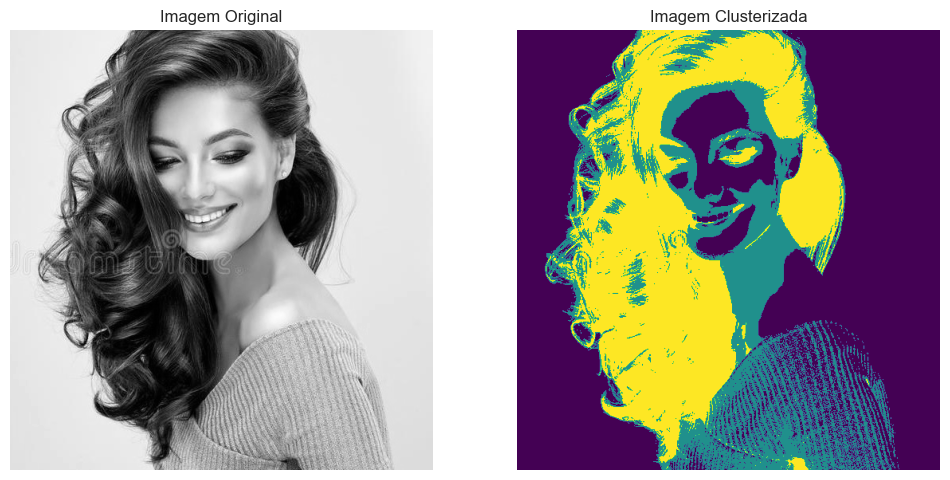

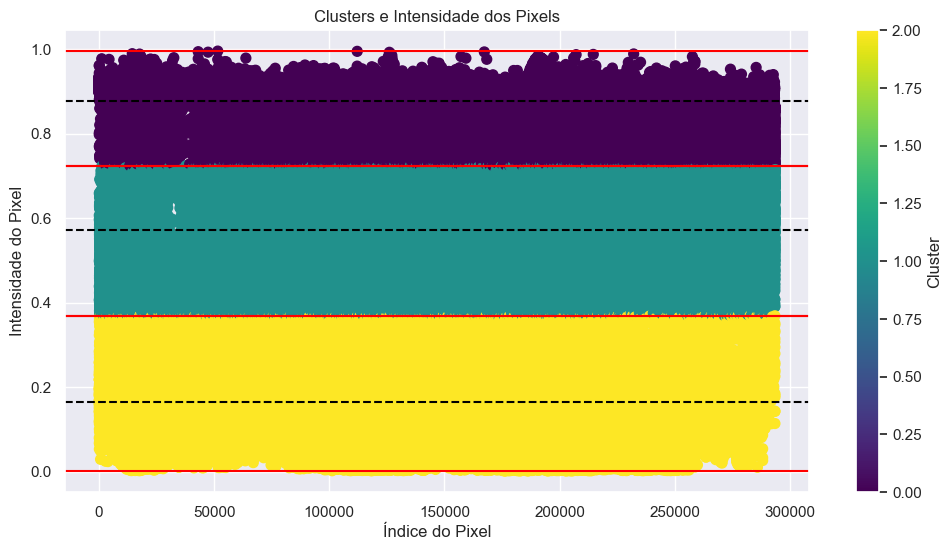

In [3]:
from PIL import Image
from skimage import color
from skimage.filters import threshold_otsu
from time import time
import numpy as np
import matplotlib.pyplot as plt
from KMeans import KMeans

print("n:", n)
R = 10
ctr = 0
t = []
s = []

for image in Img[:nImg]:
    # Converter a imagem para escala de cinza
    print("processando imagem", ctr + 1)
    T = []
    # REPETIÇÕES DO EXPERIMENTO--SEM PLOTAR-SÓ PARA MEDIR O TEMPO MEDIO--E CTRLE QLD <<<<
    for r in range(R):
        tic = time()
        
        # Converter a imagem para escala de cinza
        bw_img = color.rgb2gray(image)

        # Achatar a imagem em uma matriz 2D para a clusterização
        X = bw_img.reshape(-1, 1)

        # Configurar o número de clusters
        k = 3

        # Inicializar o KMeans e contar o tempo de execução
        kmeans = KMeans(k=k)
        clusters, centroids = kmeans.fit(X)

        # Converter os clusters de volta para a forma original da imagem
        clustered_img = clusters.reshape(bw_img.shape)

        toc = time()
        T.append((toc - tic))
        
        # Converter a imagem para escala de cinza e aplicar thresholding usando o método de Otsu
        limiar = threshold_otsu(bw_img)
        # Construir a máscara binarizada da imagem
        imagem_binarizada = bw_img > limiar

    # Gerar uma lista com os valores que não excedem K vezes a média
    t.append(np.mean(T))
    s.append(np.std(T))

    plt.hist(T, 100)
    plt.title("tmedio {:.4f}".format(t[-1]) + " stddev {:.4f}".format(s[-1]))
    plt.show()
    print("Limiar OTSU:", limiar, "calculado em", t[-1], "segundos, numa imagem de", n[ctr], "pixels")

    # Plotar a imagem original, a imagem binarizada e a imagem clusterizada
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Imagem Original')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(imagem_binarizada, cmap='binary')
    plt.title('Imagem Binarizada')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(clustered_img, cmap='viridis')
    plt.title('Imagem Clusterizada')
    plt.axis('off')

    # Plotar os clusters
    kmeans.plot_clusters(bw_img, clusters)

    ctr += 1


# 4.a Plotando os tempos estimados (de forma grosseira) em função do tamanho do problema (n)

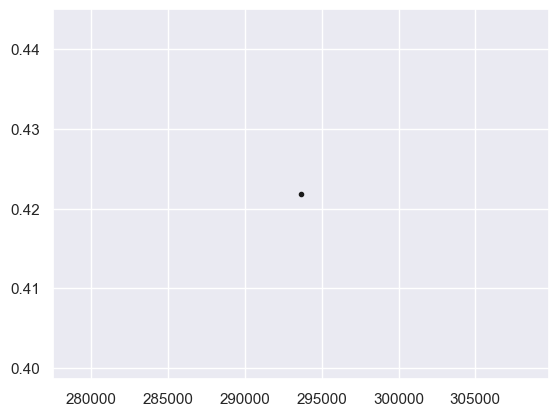

In [4]:
plt.plot(n,t,"k.")
plt.show()

# 4.b verificando a estabilidade do sistema computacional usado no experimento

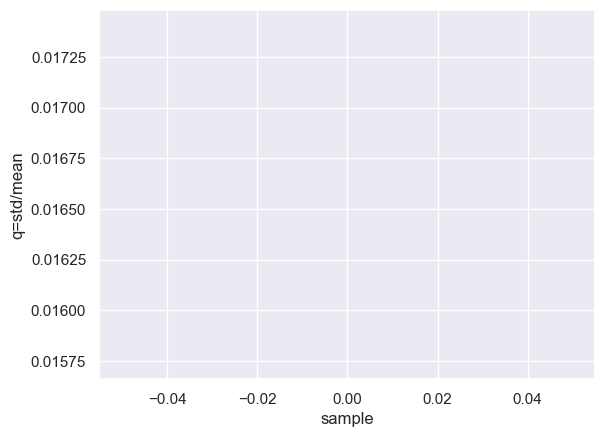

In [5]:
plt.plot(np.array(s)/np.array(t))
plt.xlabel('sample')
plt.ylabel('q=std/mean')
plt.show()

# 5. Determinando a função que ajusta os dados para estimar "experimentalmente" a complexidade do algoritmo

C:\Users\duike\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Users\duike\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\duike\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


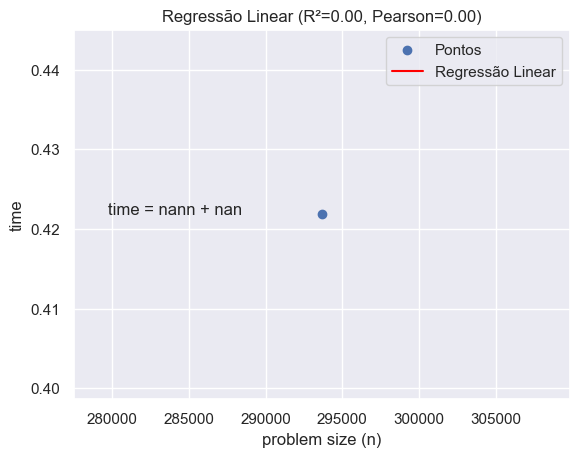

In [6]:
# Calcular a regressão linear -> primeira lternativa !!1
slope, intercept, r_value, p_value, std_err = stats.linregress(n, t)
line = slope * np.array(n) + intercept

# Calcular R^2 (coeficiente de determinação) e o coeficiente de correlação de Pearson
r_squared = r_value ** 2
pearson_coeficiente = r_value

# Plotar os pontos e a linha de regressão linear
plt.scatter(n, t, label='Pontos')
plt.plot(n, line, color='red', label='Regressão Linear')

# Adicionar título com R^2 e o coeficiente de correlação de Pearson
titulo = f'Regressão Linear (R²={r_squared:.2f}, Pearson={pearson_coeficiente:.2f})'
plt.title(titulo)
# Adicionar legenda para a equação da linha
plt.text(0.07, 0.5, f'time = {slope:.2g}n + {intercept:.2g}', fontsize=12, transform=plt.gca().transAxes)

# Adicionar legendas
plt.xlabel('problem size (n)')
plt.ylabel('time')
plt.legend()

# Exibir o gráfico
plt.show()

# 6. Conclusão do estudo: como a função linear fez um ajuste de alta qualidade ($R^2>0.95$ e $Pearson > 0.95$), concluimos que o algoritmo OTSU implementado na biblioteca python usada, tem complexidade O(n) 

# Questão:
> Quantos segundos se espera que demore a binarização de uma imagem com resolução 600 X 1200 pixels? 

#  x  =  f(arg) => foca =  [T_resposta, operações no arg, comparações no arg, atribuições no argumento + 1] 

## arg = estrutura, dado, tamanho

Exemplo:

x = f (a, n+1, 3 if x>2, else 1, Img)  => foca ?

# NOTA: T_resposta = função de n






















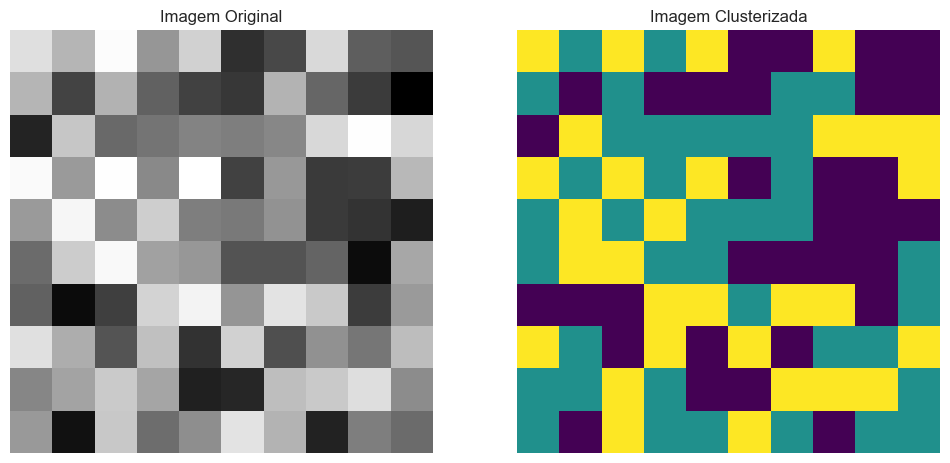

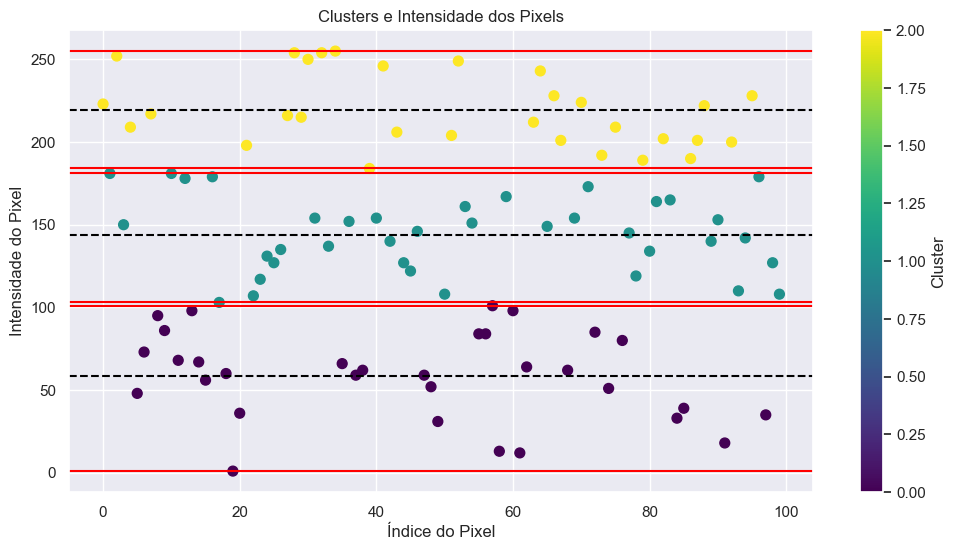

In [15]:
# Gerar uma imagem aleatória de 10x10 pixels
imagem_aleatoria = np.random.randint(0, 256, (10, 10))

# Converter a imagem para um vetor 1D
imagem_1d = imagem_aleatoria.flatten().reshape(-1, 1)

# Criar uma instância da classe KMeans e ajustá-la à imagem
kmeans = KMeans(k=3)
clusters, centroids = kmeans.fit(imagem_1d)

# Plotar os clusters
kmeans.plot_clusters(imagem_aleatoria, clusters)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

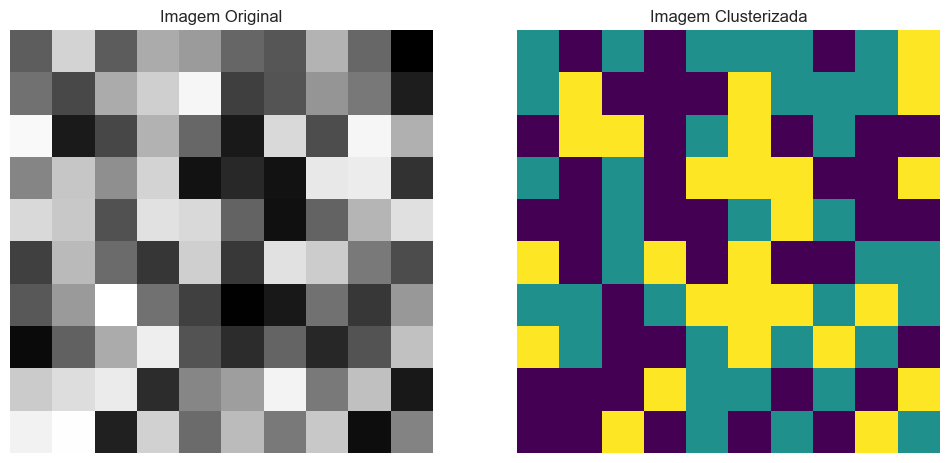

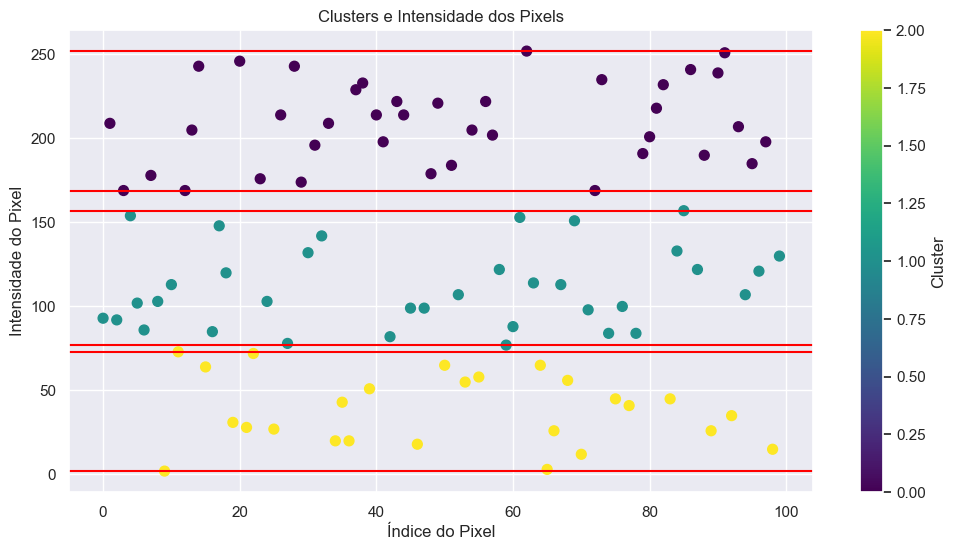

In [8]:
# Criar uma imagem 10x10 com valores aleatórios
image = np.random.randint(0, 256, (10, 10))

# Converter a imagem em uma matriz de pontos de dados
X = np.array([[i, j, image[i, j]] for i in range(image.shape[0]) for j in range(image.shape[1])])

# Definir número de clusters
k = 3

# Instanciar o KMeans e ajustar aos dados
kmeans = KMeans(k=k)
clusters, centroids = kmeans.fit(X)

# Plotar os clusters
kmeans.plot_clusters(image, clusters)

In [ ]:
image = bw_img
k = 3

# Converter os clusters de volta para uma imagem

clustered_image = np.zeros_like(image)
for idx, (i, j) in enumerate(np.ndindex(image.shape)):
    clustered_image[i, j] = clusters[idx]

# Transformar a matriz em um vetor de 1 dimensão
flat_image = image.flatten()
flat_clusters = clusters

# Plotar a imagem original e a imagem clusterizada
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Imagem Original')
axes[0].axis('off')

axes[1].imshow(clustered_image, cmap='viridis')
axes[1].set_title('Imagem Clusterizada')
axes[1].axis('off')

# Plotar os clusters em 2D
plt.figure(figsize=(12, 6))
plt.scatter(range(len(flat_image)), flat_image, c=flat_clusters, cmap='viridis', s=50)
plt.title('Clusters e Intensidade dos Pixels')
plt.xlabel('Índice do Pixel')
plt.ylabel('Intensidade do Pixel')
plt.colorbar(label='Cluster')

# Calcular os valores máximos e mínimos para cada cluster
valores_maximos = [np.max(flat_image[flat_clusters == i]) for i in range(len(np.unique(flat_clusters)))]
valores_minimos = [np.min(flat_image[flat_clusters == i]) for i in range(len(np.unique(flat_clusters)))]

# Juntar os valores máximos e mínimos em um único array
valores_clusters = np.concatenate((valores_maximos, valores_minimos))

for valor in valores_clusters:
    plt.axhline(y=valor, color='red', linestyle='-')


for valor in kmeans.centroids:
    plt.axhline(y=valor, color='black', linestyle='--')

plt.show()
